[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/8_1_Transforming_Variables.ipynb)

Load packages and read in data. The data set is performance values of different computers (PRP) based on MYCT - machine cycle time, MMIN - minimum main memory, MMAX - maximum main memory, CACH - cache memory, CHMIN - minimum channels, CHMAX - maximum channels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

performance = pd.read_csv("https://richardson.byu.edu/220/performance.csv")
performance

,vendor,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,adviser,32/60,125,256,6000,256,16,128,198
1,amdahl,470v/7,29,8000,32000,32,8,32,269
2,amdahl,470v/7a,29,8000,32000,32,8,32,220
3,amdahl,470v/7b,29,8000,32000,32,8,32,172
4,amdahl,470v/7c,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46
206,sratus,32,125,2000,8000,0,2,14,52
207,wang,vs-100,480,512,8000,32,0,0,67


Plot a histogram of the target variable. Notice that it is significantly right skewed. This is dangerous because the smaller amount of data points in the right tail will influence the estimates more than the larger bulk of the data.

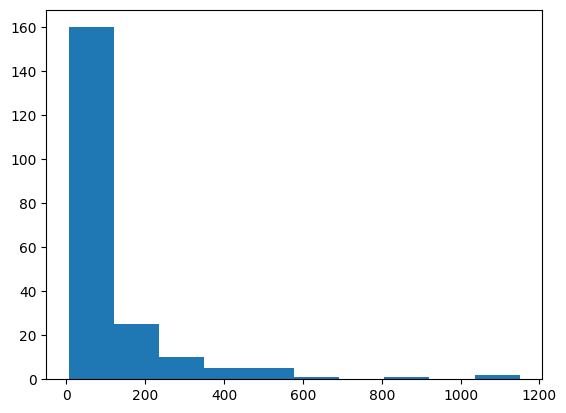

In [2]:
plt.hist(performance.PRP)
plt.show()

Take the log of the data and plot the histogram. What happens to the right tail?

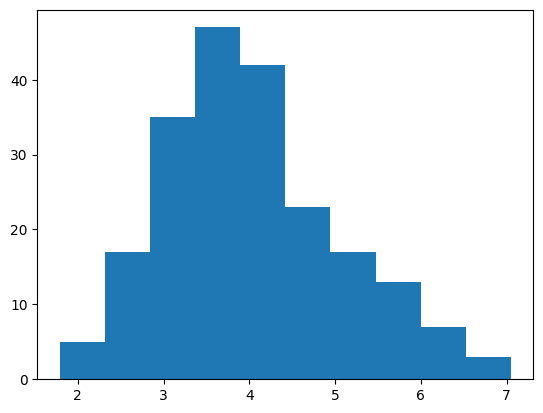

In [3]:
plt.hist(np.log(performance.PRP))
plt.show()

performance["logPRP"] = np.log(performance.PRP)

Explore relationships between performance and machine cycle time

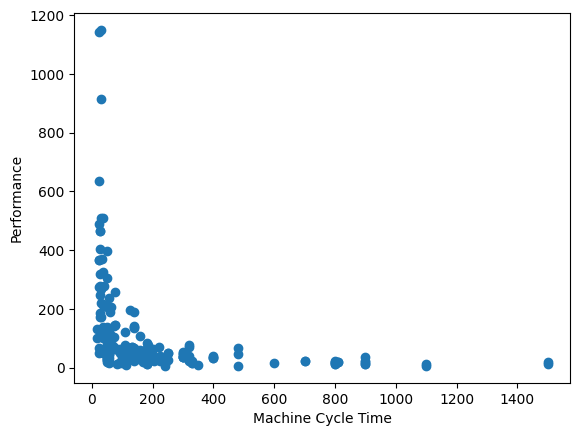

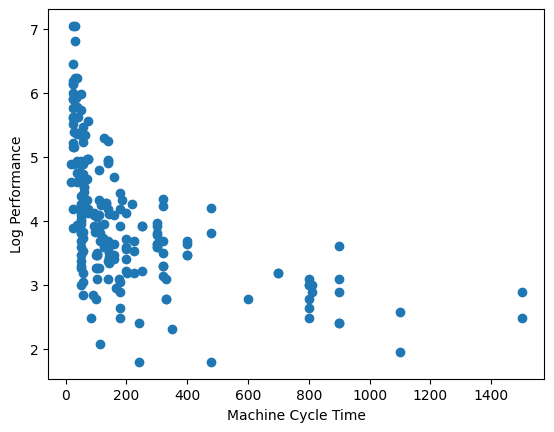

In [4]:
plt.scatter(performance.MYCT,performance.PRP)
plt.xlabel("Machine Cycle Time")
plt.ylabel("Performance")
plt.show()

plt.scatter(performance.MYCT,performance.logPRP)
plt.xlabel("Machine Cycle Time")
plt.ylabel("Log Performance")
plt.show()

View Machine cycle time alone. Again see how taking the log affects the predictor. Does it matter if a predictor is right skewed? Yes because again the model will try to account for the tail and sacrifice a good fit for the rest of the data.

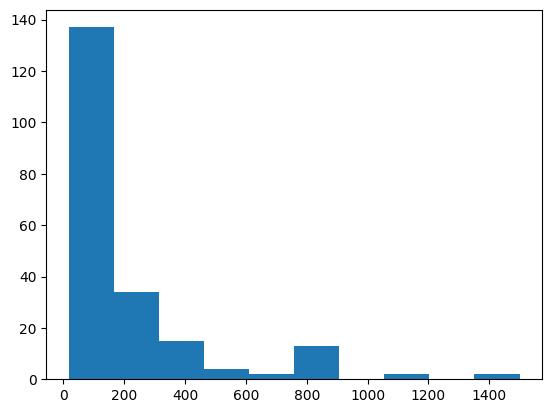

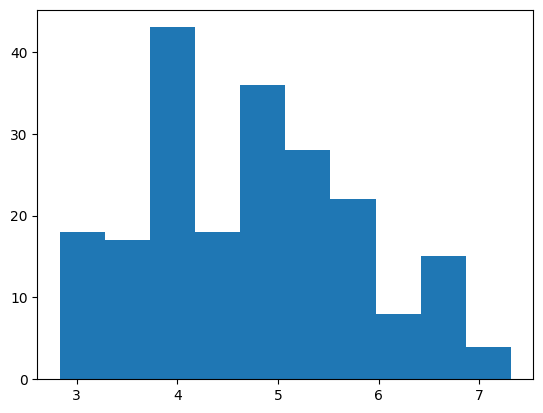

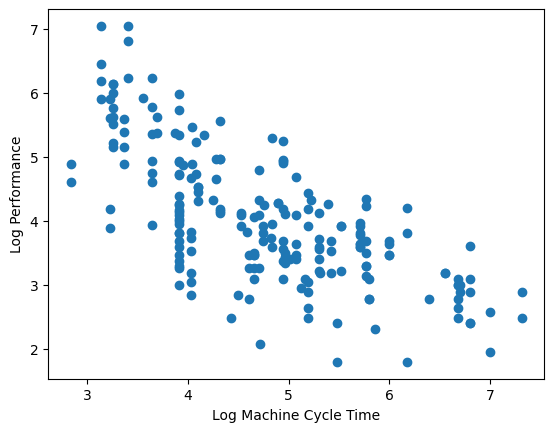

In [5]:
plt.hist(performance.MYCT)
plt.show()

plt.hist(np.log(performance.MYCT))
plt.show()

plt.scatter(np.log(performance.MYCT),performance.logPRP)
plt.xlabel("Log Machine Cycle Time")
plt.ylabel("Log Performance")
plt.show()

Take log of the MYCT variable

In [6]:
performance["logMYCT"] = np.log(performance.MYCT)

Fit a linear model with no transformations. For illustrating the transformations, we will only use 1 predictor.

In [7]:
X = performance[["MYCT"]]
y = performance.PRP
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
from sklearn.linear_model import LinearRegression

reg_prep = LinearRegression()
mod_reg = reg_prep.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error, r2_score
in_sample_reg = mod_reg.predict(X_test)
mse_1 = np.sqrt(mean_squared_error(y_test,in_sample_reg))
r2_1 = r2_score(y_test,in_sample_reg)
print("rMSE: ",mse_1)
print("R^2: ",r2_1)

rMSE:  159.7905261800612
R^2:  0.08334344314787523


Plot the residuals versus fitted values.

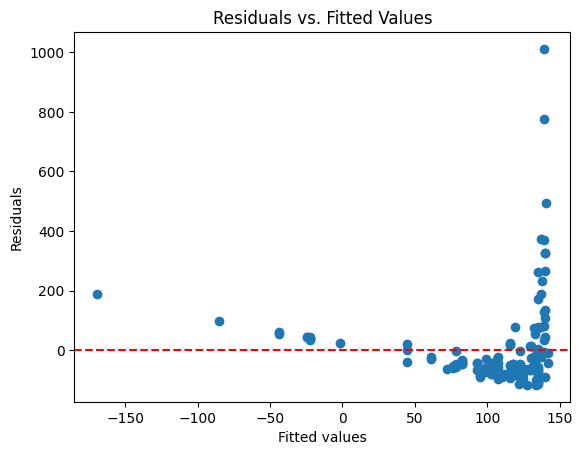

In [9]:
# Predictions
y_pred = mod_reg.predict(X_train)

# Residuals
residuals = y_train - y_pred

# Plotting
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="r",linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()


Find the MSE and R^2 of a log-linear regression model, which is a regression model where the log of the target is taken.

In [ ]:
X = performance[["logMYCT"]]
logy = performance.logPRP
X_train, X_test, logy_train, logy_test = train_test_split(X, y, test_size=0.3, random_state=1234)

reg_prep2 = LinearRegression()
mod_reg_log = reg_prep2.fit(X_train,logy_train)
in_sample_reg2 = mod_reg_log.predict(X_test)
# These MSE and R^2 values actually don't make sense
mse_2 = np.sqrt(mean_squared_error(logy_test,in_sample_reg2))
r2_2 = r2_score(logy_test,in_sample_reg2)
print("rMSE: ",mse_2)
print("R^2: ",r2_2)

rMSE:  0.7263009738786254
R^2:  0.5188697554007771


Transform predictions back to the original scale to find MSE and R^2 in order to compare models.

In [ ]:

in_sample_reg2 = np.exp(mod_reg_log.predict(X_test))
mse_2 = np.sqrt(mean_squared_error(np.exp(logy_test),in_sample_reg2))
r2_2 = r2_score(np.exp(logy_test),in_sample_reg2)
print("rMSE: ",mse_2)
print("R^2: ",r2_2)

rMSE:  143.3672592016904
R^2:  0.26208802007663257
